In [2]:
import cv2
import os
import pandas as pd
import math
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing

In [6]:
os.chdir('/content/drive/MyDrive/dataset/Action_Recognition/')

In [11]:
ls

dribling/  headshot/  kicking/  running/


In [50]:
os.chdir('/content/drive/MyDrive/dataset/Action_Recognition/dribling/')

In [51]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
Dribling = onlyfiles[1:]

In [52]:
os.chdir('/content/drive/MyDrive/dataset/Action_Recognition/headshot/')

In [53]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
Headshot = onlyfiles[1:]

In [54]:
os.chdir('/content/drive/MyDrive/dataset/Action_Recognition/kick/')

In [55]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
Kick = onlyfiles[1:]

In [56]:
os.chdir('/content/drive/MyDrive/dataset/Action_Recognition/running/')

In [57]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
Running = onlyfiles[1:]

In [58]:
DriblingTrain = Dribling[:int(len(Dribling)*0.7)]
HeadshotTrain = Headshot[1:int(len(Headshot)*0.7)]
KickTrain = Kick[1:int(len(Kick)*0.7)]
RunningTrain=Running[1:int(len(Running)*0.7)]

In [59]:
trainNames = []
for each in DriblingTrain:
    trainNames.append(each)
for each in HeadshotTrain:
    trainNames.append(each)
for each in KickTrain:
    trainNames.append(each)
for each in RunningTrain:
    trainNames.append(each)  

In [60]:

len(trainNames)

102

In [61]:
DriblingTest = Dribling[int(len(Dribling)*0.7):]
HeadshotTest = Headshot[int(len(Headshot)*0.7):]
KickTest = Kick[int(len(Kick)*0.7):]
RunningTest = Running[int(len(Running)*0.7):]


In [62]:
testNames = []
for each in DriblingTest :
    testNames.append(each)
for each in HeadshotTest:
    testNames.append(each)
for each in KickTest:
    testNames.append(each)
for each in RunningTest:
    testNames.append(each)

In [63]:
len(testNames)

47

In [65]:
train = pd.DataFrame()
train['video_Names']=trainNames
train_video_tag = []
for i in range(train.shape[0]):
    train_video_tag.append(train['video_Names'][i].split('_')[1])
train['tag'] = train_video_tag   
train

,video_Names,tag
0,v_dribling_g1_c3.mp4,dribling
1,v_dribling_g1_c2.mp4,dribling
2,v_dribling_g1_c1.mp4,dribling
3,v_dribling_g2_c1.mp4,dribling
4,v_dribling_g2_c2.mp4,dribling
...,...,...
97,v_running_g6_c1.mp4,running
98,v_running_g7_c1.mp4,running
99,v_running_g8_c1.mp4,running
100,v_running_g9_c1.mp4,running


In [ ]:
test = pd.DataFrame()
test['video_Names']=testNames
test_video_tag = []
for i in range(test.shape[0]):
    test_video_tag.append(test['video_Names'][i].split('_')[1])
test['tag'] = test_video_tag    
test

In [67]:
os.chdir('/content/drive/MyDrive/dataset/')

In [68]:
#frames extraction
count=0
for i in tqdm(range(train.shape[0])):

    videoFile = train['video_Names'][i].split(" ")[0].split("_")[1]+"/"+train['video_Names'][i]
    cap = cv2.VideoCapture('Action_Recognition/'+videoFile)
    frameRate = cap.get(5)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
        
            # storing the frames in a new folder named train_1
        
            filename ='train/' + train["video_Names"][i].split("_")[1]+"_"+train["video_Names"][i].split("_")[2]+ train["video_Names"][i].split("_")[3].split(".")[0] +"_frame%d.jpg" %count
            count = count+1
            cv2.imwrite(filename, frame)

    cap.release()

100%|██████████| 102/102 [00:11<00:00,  8.78it/s]


In [80]:
images = glob("train/*.jpg")

In [81]:
train_image = []
train_class =[]
for i in tqdm(range(len(images))):
    train_image.append(images[i].split('/')[1])
    train_class.append(images[i].split('/')[1].split("_")[0])

100%|██████████| 110/110 [00:00<00:00, 69809.87it/s]


In [73]:
pwd

'/content/drive/My Drive/dataset'

In [88]:
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('/content/drive/MyDrive/dataset/train_new.csv',header=True, index=False)

In [83]:
count=0
for i in tqdm(range(test.shape[0])):
    
    videoFile = test['video_Names'][i].split(" ")[0].split("_")[1]+"/"+test['video_Names'][i]
    cap = cv2.VideoCapture('Action_Recognition/'+videoFile)
    frameRate = cap.get(5)
    while(cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            filename = 'test/' + test["video_Names"][i].split("_")[1]+"_"+test['video_Names'][i].split("_")[2]+test['video_Names'][i].split("_")[3].split(".")[0]+"_frame%d.jpg" %count
            count = count+1
            cv2.imwrite(filename, frame)
            
    cap.release()

100%|██████████| 47/47 [00:01<00:00, 44.42it/s]


In [ ]:
images = glob("test/*.jpg")
images

In [86]:
test_image = []
test_class =[]
for i in tqdm(range(len(images))):
    test_image.append(images[i].split('/')[1])
    test_class.append(images[i].split('/')[1].split("_")[0])

100%|██████████| 53/53 [00:00<00:00, 212725.47it/s]


In [87]:
test_data = pd.DataFrame()
test_data['image'] = test_image
test_data['class'] = test_class

# converting the dataframe into csv file 
test_data.to_csv('/content/drive/MyDrive/dataset/test_new.csv',header=True, index=False)

In [27]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
cd ..

/content/drive/MyDrive/dataset


CNN model

In [8]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [9]:
CLASS_NAMES = ["dribling","headshot","kick","running"]

In [10]:
cd dataset

[Errno 2] No such file or directory: 'dataset'
/content/drive/MyDrive/dataset


In [11]:
#frames preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size= (256, 256),
    color_mode = 'rgb')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
    'test/',
    target_size= (256, 256),
    batch_size = 5,
    color_mode = 'rgb')

Found 105 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (256,256,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation = 'softmax'))
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = 'adam',
             metrics = ['accuracy'])

history=model.fit(train_generator,epochs =10,validation_data=validation_generator)
model.save("/content/drive/My Drive/dataset/modelCNN.h5")

Epoch 1/10
4/4 [==============================] - 9s 2s/step - loss: 2.7345 - accuracy: 0.3714 - val_loss: 1.0275 - val_accuracy: 0.2400
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.8975 - accuracy: 0.4952 - val_loss: 0.8805 - val_accuracy: 0.6400
Epoch 3/10
4/4 [==============================] - 8s 2s/step - loss: 0.6608 - accuracy: 0.7048 - val_loss: 0.7481 - val_accuracy: 0.6400
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.5895 - accuracy: 0.7524 - val_loss: 0.7043 - val_accuracy: 0.6600
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 0.4966 - accuracy: 0.8286 - val_loss: 0.6975 - val_accuracy: 0.6600
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.4174 - accuracy: 0.8190 - val_loss: 0.7442 - val_accuracy: 0.6200
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 0.3263 - accuracy: 0.8762 - val_loss: 0.6970 - val_accuracy: 0.7000
Epoch 8/10
4/4 [=========================

In [15]:
model.evaluate(validation_generator)

10/10 [==============================] - 1s 88ms/step - loss: 1.0204 - accuracy: 0.6800


[1.0203996896743774, 0.6800000071525574]

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)       

In [17]:
from keras.callbacks import History 

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


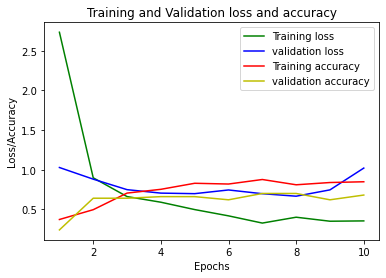

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'y', label='validation accuracy')
plt.title('Training and Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [23]:
pwd


'/content/drive/My Drive/dataset'

In [19]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras.preprocessing import image
model=load_model('/content/drive/My Drive/dataset/modelCNN.h5')

In [20]:
pwd

'/content/drive/My Drive/dataset'

In [36]:
#prediction
test_image=image.load_img('test/headshot/headshot_g19c21_frame34.jpg',target_size=(256,256))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
label=model.predict(test_image)
print(label)

if label[0][2]==1:
    print('kick')
elif label[0][0]==1:
    print('dribling')
elif label[0][1]==1:
    print('headshot')

[[0. 1. 0.]]
headshot


LSTM

Part 1: Spacial Featuring

In [38]:
modelfeatured=models.Model(
    inputs=model.input,
    outputs=model.get_layer('flatten_1').output
)

In [40]:
modelfeatured1 = models.Model(
    inputs=model.input,
    outputs=model.get_layer('dense_2').output
)

In [41]:
base_model = tf.keras.applications.inception_v3.InceptionV3(
    weights='imagenet',
    include_top=True
)
# We'll extract features at the final pool layer.
modelfeatured3 = models.Model(
    inputs=base_model.input,
    outputs=base_model.get_layer('avg_pool').output
)

96124928/96112376 [==============================] - 1s 0us/step


In [42]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1./255,
  validation_split=0.2,
  shear_range = 0.2, # random application of shearing
  zoom_range = 0.2,
  horizontal_flip = True) # randomly flipping half of the images horizontally
train_datagen
train_generator = train_datagen.flow_from_directory(
  'train/',
  target_size = (256, 256),
  shuffle = True,
  color_mode = 'rgb')
  
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
  'test/',
  target_size = (256, 256),
  batch_size = 15,
  shuffle=True,
  color_mode = 'rgb')

Found 105 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [97]:
modelfeatured = modelfeatured1
#modelfeatured = modelfeatured2
#modelfeatured = modelfeatured

train_featured = modelfeatured.predict(train_generator)
test_featured = modelfeatured.predict(validation_generator)

In [98]:
np.savetxt('/content/drive/MyDrive/dataset/ftrainf.csv',train_featured, delimiter=',')
np.savetxt('/content/drive/MyDrive/dataset/ftestf.csv',test_featured, delimiter=',')

Part 2: Temporal Featuring

In [99]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      shear_range = 0.2, # random application of shearing
      zoom_range = 0.2,
      validation_split=0.2,
      horizontal_flip = True) # randomly flipping half of the images horizontally

train_generator = train_datagen.flow_from_directory(
      'train/',
      target_size = (256, 256),
      shuffle = True,
      color_mode = "rgb")

Found 105 images belonging to 3 classes.


In [100]:
model = models.Sequential()
model.add(layers.Conv2D(256, kernel_size=(1, 1),input_shape=(256,256, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (1, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))       
model.add(layers.Dense(3, activation='softmax'))

In [101]:
model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
#model.load_weights('modelCNN.h5')
callback = tf.keras.callbacks.EarlyStopping(patience=3)
model.fit(train_generator,epochs=9,batch_size=6)
model.save_weights("modelFF.h5")

Epoch 1/9
4/4 [==============================] - 46s 11s/step - loss: 1.2450 - accuracy: 0.4476
Epoch 2/9
4/4 [==============================] - 43s 10s/step - loss: 0.8948 - accuracy: 0.6000
Epoch 3/9
4/4 [==============================] - 42s 10s/step - loss: 0.7515 - accuracy: 0.6667
Epoch 4/9
4/4 [==============================] - 42s 10s/step - loss: 0.6900 - accuracy: 0.6667
Epoch 5/9
4/4 [==============================] - 42s 10s/step - loss: 0.6823 - accuracy: 0.7333
Epoch 6/9
4/4 [==============================] - 42s 13s/step - loss: 0.5858 - accuracy: 0.7333
Epoch 7/9
4/4 [==============================] - 42s 13s/step - loss: 0.4243 - accuracy: 0.8190
Epoch 8/9
4/4 [==============================] - 42s 10s/step - loss: 0.2867 - accuracy: 0.8952
Epoch 9/9
4/4 [==============================] - 42s 10s/step - loss: 0.2956 - accuracy: 0.9238


In [102]:
model.evaluate(train_generator)

4/4 [==============================] - 10s 2s/step - loss: 0.9535 - accuracy: 0.6476


[0.9535433053970337, 0.6476190686225891]

In [103]:
train_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train/',
        target_size=(256, 256),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = train_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(train_generator)
frame = pd.DataFrame(predict, columns=[1,2,3])
feature_train_1 = pd.DataFrame(frame.idxmax(axis=1),columns=["class"])

Found 105 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [104]:
test_datagen1 =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator1 = test_datagen1.flow_from_directory(
        'test/',
        target_size=(256, 256),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator1.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator1)
frame = pd.DataFrame(predict, columns=[1,2,3])
feature_test_1 = pd.DataFrame(frame.idxmax(axis=1),columns=["class"])

Found 50 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [53]:
mkdir features

mkdir: cannot create directory ‘features’: File exists


In [105]:
feature_test_1.to_csv('features/feature_test_1.csv', index=False)
feature_train_1.to_csv('features/feature_train_1.csv', index=False)

In [106]:
feature_test_1 = pd.read_csv('features/feature_test_1.csv')
feature_train_1 = pd.read_csv('features/feature_train_1.csv')

Part 3: LSTM Modelling
Here LSTM model is build on the sequenced dataframes from each video These dataframes have 
extracted  1.spacial features from the cnn model  2.temporal features from cnn or other models

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [107]:
df = np.genfromtxt('ftrainf.csv', delimiter=',')
scaler=MinMaxScaler()

scaled=scaler.fit_transform(df)
df=pd.DataFrame(scaled)

kmean4=KMeans(n_clusters=4)
kmean4.fit(df)
y_hat = kmean4.predict(df)
feature_train_2 = y_hat.reshape(y_hat.shape[0],1)

In [108]:
np.savetxt('features/feature_test_2.csv',feature_test_1, delimiter=',')
np.savetxt('features/feature_train_2.csv',feature_train_1, delimiter=',')
feature_test_2 = np.genfromtxt('features/feature_test_2.csv', delimiter=',')
feature_train_2 = np.genfromtxt('features/feature_train_2.csv', delimiter=',')
feature_train_2 = feature_train_2.reshape(feature_train_2.shape[0],1)
feature_test_2 = feature_test_2.reshape(feature_test_2.shape[0],1)

In [109]:
train_featured = np.genfromtxt('ftrainf.csv', delimiter=',')
test_featured = np.genfromtxt('ftestf.csv', delimiter=',')
n_steps = 5  ##We set frame rate as 30
n_features = test_featured.shape[1]

In [110]:
test_featured = np.append(test_featured,feature_test_1,axis=1)
train_featured = np.append(train_featured,feature_train_1,axis=1)
test_featured = np.append(test_featured,feature_test_2,axis=1)
train_featured = np.append(train_featured,feature_train_2,axis=1)

In [111]:
train_featured.shape

(105, 202)

In [112]:
temp = train_featured[:n_steps]
temp = temp.reshape(1,n_steps,temp.shape[1])
for i in range(n_steps,train_featured.shape[0],n_steps):
  temp = np.append(temp,train_featured[i:i+n_steps].reshape(1,n_steps,train_featured.shape[1]),axis = 0)
trainX = temp
temp = test_featured[:n_steps]
temp = temp.reshape(1,temp.shape[0],temp.shape[1])
for i in range(n_steps,test_featured.shape[0],n_steps):
  temp = np.append(temp,test_featured[i:i+n_steps].reshape(1,n_steps,test_featured.shape[1]),axis = 0)
testX = temp

In [113]:
trainX.shape

(21, 5, 202)

In [114]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      #validation_split=0.2,
      shear_range = 0.2, # random application of shearing
      zoom_range = 0.2,
      horizontal_flip = True) # randomly flipping half of the images horizontally

train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size = (256, 256),
    shuffle = False,
    color_mode = "rgb")
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
    'test/',
    target_size = (256, 256),
    batch_size = 15,
    shuffle=False,
    color_mode = 'rgb')

Found 105 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [115]:
y_train = []
for i in train_generator.filenames:
  if(i.split("/")[0]=="dribling"):
    y_train.append(-100) 
  elif(i.split("/")[0]=="headshot"):
    y_train.append(0)
  elif(i.split("/")[0]=="kick"):
    y_train.append(100) 

y_test = []
for i in validation_generator.filenames:
  if(i.split("/")[0]=="dribling"):
    y_test.append(-100) 
  elif(i.split("/")[0]=="headshot"):
    y_test.append(0)
  elif(i.split("/")[0]=="kick"):
    y_test.append(100) 

trainY=[]
for i in range(0,len(y_train),n_steps):
  trainY.append(y_train[i])
testY=[]
for i in range(0,len(y_test),n_steps):
  testY.append(y_test[i])


trainY = np.array(trainY)
testY = np.array(testY)

trainY=[]
for i in range(0,len(y_train),n_steps):
  trainY.append(y_train[i])
testY=[]
for i in range(0,len(y_test),n_steps):
  testY.append(y_test[i])

TRAINy = pd.DataFrame(trainY)
TRAINy.columns = ['label']
TRAINy['1']=0
TRAINy['2']=0
TRAINy['3']=0
for i in TRAINy.loc[TRAINy['label']==-100].index:
  TRAINy.loc[i,"1"]=1
for i in TRAINy.loc[TRAINy['label']==0].index:
  TRAINy.loc[i,"2"]=1
for i in TRAINy.loc[TRAINy['label']==100].index:
  TRAINy.loc[i,"3"]=1
final_trainY =np.array(TRAINy[['1','2','3']])

TESTy = pd.DataFrame(testY)
TESTy.columns = ['label']
TESTy['1']=0
TESTy['2']=0
TESTy['3']=0
for i in TESTy.loc[TESTy['label']==-100].index:
  TESTy.loc[i,"1"]=1
for i in TESTy.loc[TESTy['label']==0].index:
  TESTy.loc[i,"2"]=1
for i in TESTy.loc[TESTy['label']==100].index:
  TESTy.loc[i,"3"]=1
final_testY = np.array(TESTy[['1','2','3']])

In [116]:
testX.shape

(10, 5, 202)

In [151]:
model2 = models.Sequential()
model2.add(layers.LSTM(500, activation='relu', return_sequences=True, input_shape=(n_steps, n_features+2)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.LSTM(500, activation='relu'))
model2.add(layers.Dense(3,activation="softmax"))

In [154]:
optimizer = tf.keras.optimizers.Adam(lr=1e-4, decay=1e-5)
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
                    metrics=['accuracy','top_k_categorical_accuracy'])
#model2.load_weights("modelLstm.h5")
model2.fit(trainX,final_trainY,validation_data=(testX,final_testY),batch_size=8,epochs=20)
model2.evaluate(testX,final_testY,batch_size = 8)
model2.save("modelLstm.h5")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
3/3 [==============================] - 3s 250ms/step - loss: 0.0306 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 2.8519 - val_accuracy: 0.8000 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 80ms/step - loss: 2.0689e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.7332 - val_accuracy: 0.7000 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 74ms/step - loss: 0.0097 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.1260 - val_accuracy: 0.7000 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 84ms/step - loss: 2.1004e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.0745 - val_accuracy: 0.6000 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 85ms/step - loss: 5.9540e-04 - accuracy: 1.0000 - top_k_categorical_ac

In [156]:
model2.evaluate(testX,final_testY,batch_size = 8)

2/2 [==============================] - 0s 12ms/step - loss: 1.4148 - accuracy: 0.8000 - top_k_categorical_accuracy: 1.0000


[1.414771556854248, 0.800000011920929, 1.0]

In [159]:
import cv2
from tensorflow import keras
from keras.preprocessing import image

#model1=load_model("modelCNN.h5")
model2 = load_model("/content/drive/MyDrive/dataset/modelLstm.h5")

imagePath = 'test/headshot/headshot_g19c21_frame34.jpg'
img_width, img_height = 256, 256
img = image.load_img(imagePath, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

a = model1.predict(img)

print(a)
if a[0][2]==1:
    print('kick')
elif a[0][0]==1:
    print('dribling')
elif a[0][1]==1:
    print('headshot')

[[0. 1. 0.]]
headshot


In [160]:
import cv2
from tensorflow import keras
from keras.preprocessing import image

#model1=load_model("modelCNN.h5")
model2 = load_model("/content/drive/MyDrive/dataset/modelLstm.h5")

imagePath = 'test/dribling/dribling_g22c1_frame18.jpg'
img_width, img_height = 256, 256
img = image.load_img(imagePath, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

a = model1.predict(img)

print(a)
if a[0][2]==1:
    print('kick')
elif a[0][0]==1:
    print('dribling')
elif a[0][1]==1:
    print('headshot')

[[1. 0. 0.]]
dribling
